# Regularized regression

## Why regularize?
- Recall: Linear regression minimizes a loss function
- It chooses a coefficient for each feature variable
- Large coefficients can lead to overfitting
- Pernalizing large coefficients: Regularization


It is a common practice to alter the loss function so that it penalizes for large coefficients.

## Ridge regression
- Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} a_i^2$<br>(Constant alpha times sum of coefficients squared)
- When minimize the loss function to fit to our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients
- **Alpha** is a parameter we need to choose
- Picking alpha is similar to picking **k** in k-NN
- Hyperparameter tuning
- Alpha controls model complexity
 - Alpha = 0: We get back OLS (can lead to *overfitting*)<br>Large coefficients are not penalized and the overfitting problem is not accounted for
 - Very high alpha: can lead to *underfitting*
 
```python
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True)
```
Note: normalize ensures that all variables are on the same scale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

boston = pd.read_csv('datasets/boston.csv')
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.6996938275127313

## Lasso regression
- Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} |{a_i}|$
- Similar usage with Ridge (alpha, normalize,... params)
- Can be used to select important features of a dataset
- Shrinks the coefficients of less important features to exactly 0.<br>The features whose coefficients are not shrunk to zero are 'selected' by the LASSO algorithm.

In [3]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

lasso.score(X_test, y_test)

0.595022953532855

## Lasso for feature selection in scikit-learn

In [9]:
names = boston.drop('MEDV', axis=1).columns

lasso = Lasso(alpha=0.1, normalize=True)

lasso_coef = lasso.fit(X, y).coef_
lasso_coef

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469455, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795837,  0.        , -0.42817439])

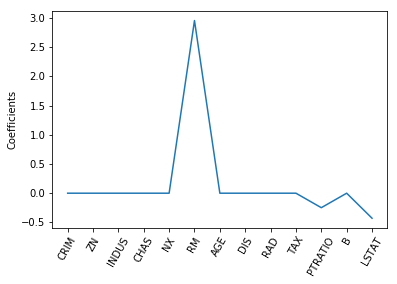

In [11]:
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients');

Most important predictor for the housing price target variable is number of rooms (RM)